# IMPORT LIBRARY

In [135]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,cohen_kappa_score,roc_curve,make_scorer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif
from collections import Counter


Data Overview

In [136]:
df = pd.read_csv('Data Train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [137]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 4250

Number of features: 20

Features:
['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']

Missing values: 0

Unique values:
state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes            

# EXPLORATORY DATA ANALYSIS

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [139]:
df.describe(include=["object"]).T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


In [140]:
# Check missing values data 
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [141]:
# Check duplicated data 
df.duplicated().sum()

0

CUSTOMER CHURN IN DATA

no     3652
yes     598
Name: churn, dtype: int64


<Axes: xlabel='churn', ylabel='count'>

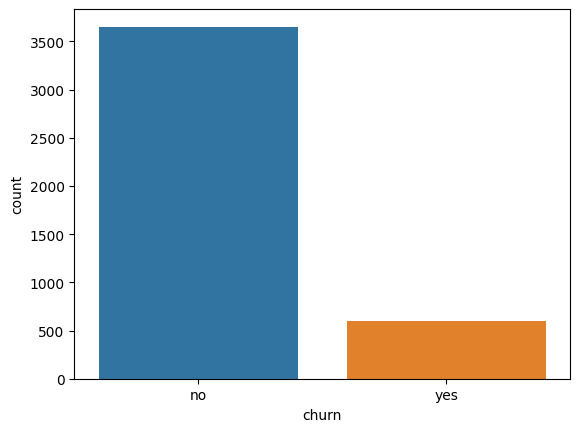

In [142]:
y = df["churn"].value_counts()
print(y)
sns.countplot(data=df, x=df['churn'])

<Axes: xlabel='area_code', ylabel='count'>

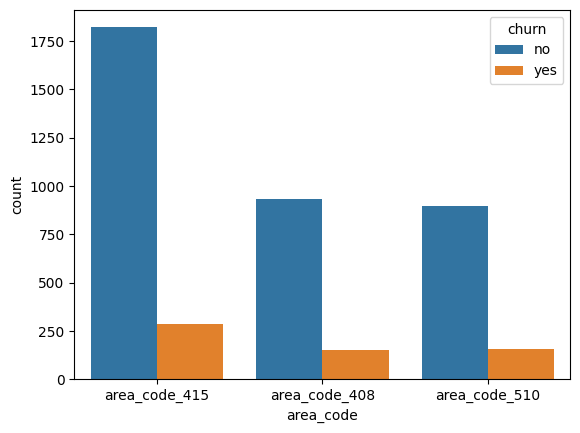

In [143]:
sns.countplot(data=df, x=df['area_code'], hue='churn')

<Axes: xlabel='international_plan', ylabel='count'>

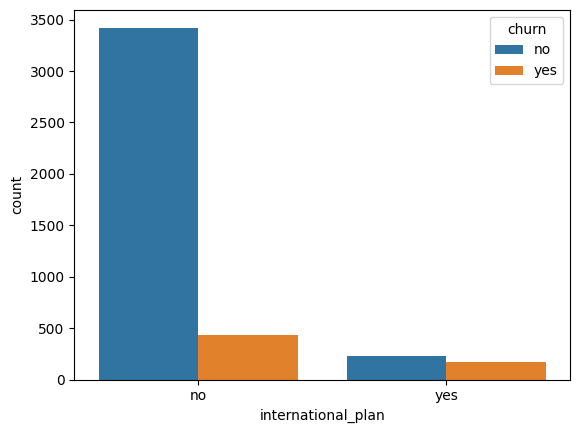

In [144]:
sns.countplot(data=df, x=df['international_plan'], hue='churn')

VARIABLE DISTRIBUTONS

In [145]:
col=df.columns

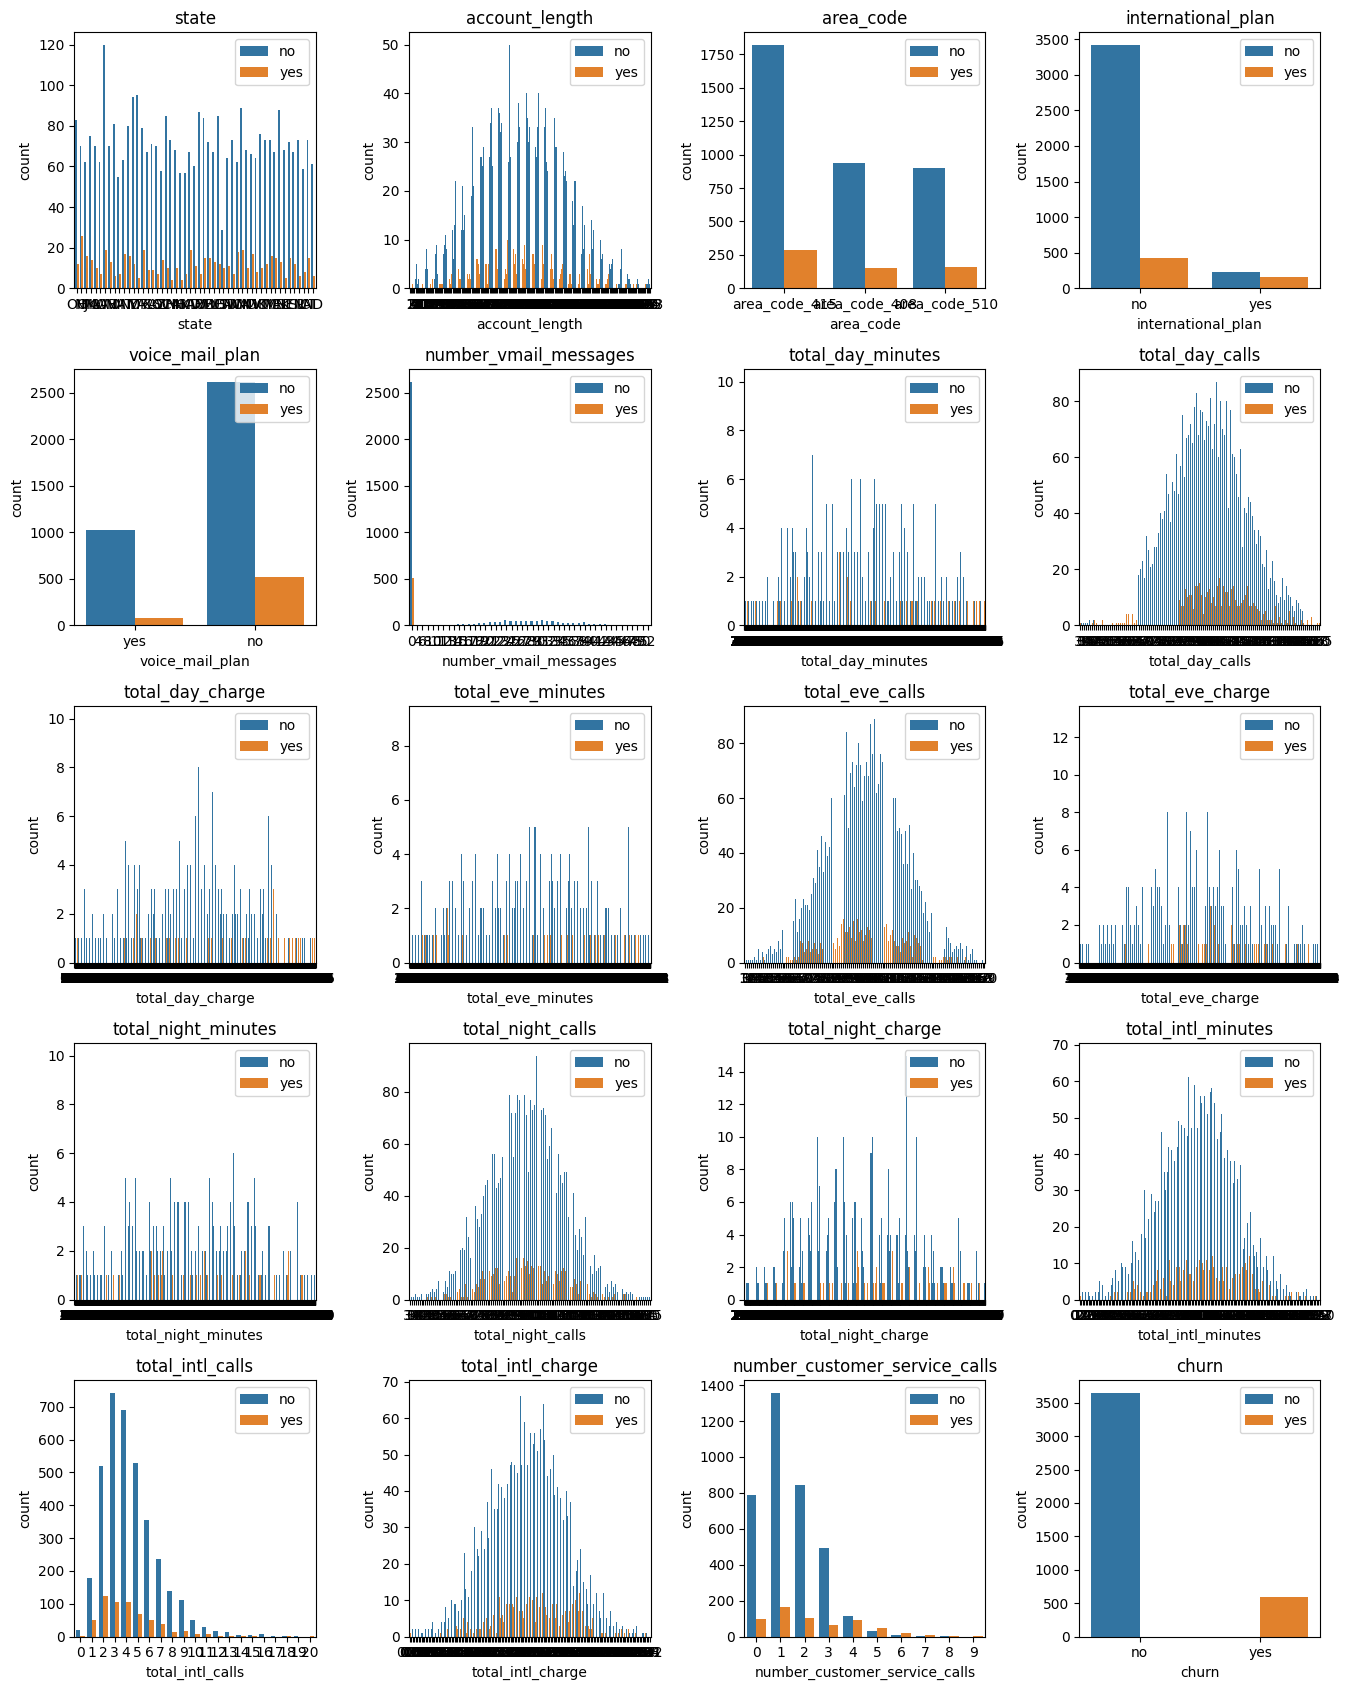

In [47]:
n_rows=5
n_cols=4

fig,axis=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.4,n_rows*3.4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axis[r][c]
        sns.countplot(x=df[col[i]],hue=df['churn'],ax=ax)
        ax.set_title(col[i])
        ax.legend(loc='upper right')

plt.tight_layout()

<Axes: xlabel='voice_mail_plan', ylabel='count'>

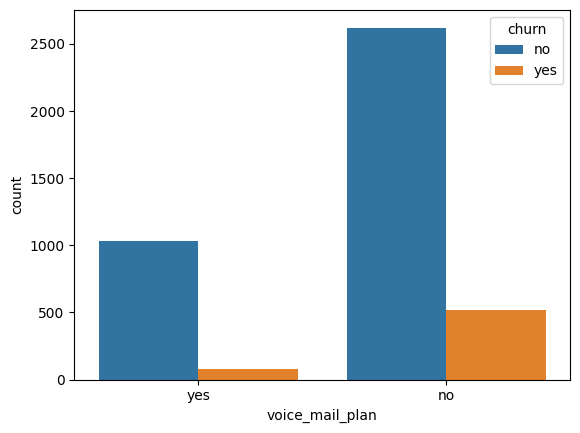

In [146]:
sns.countplot(data=df, x=df['voice_mail_plan'], hue='churn')

CORRELATION DATA WITH MATRIX

C:\Users\Riza\AppData\Local\Temp\ipykernel_9896\1414518798.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

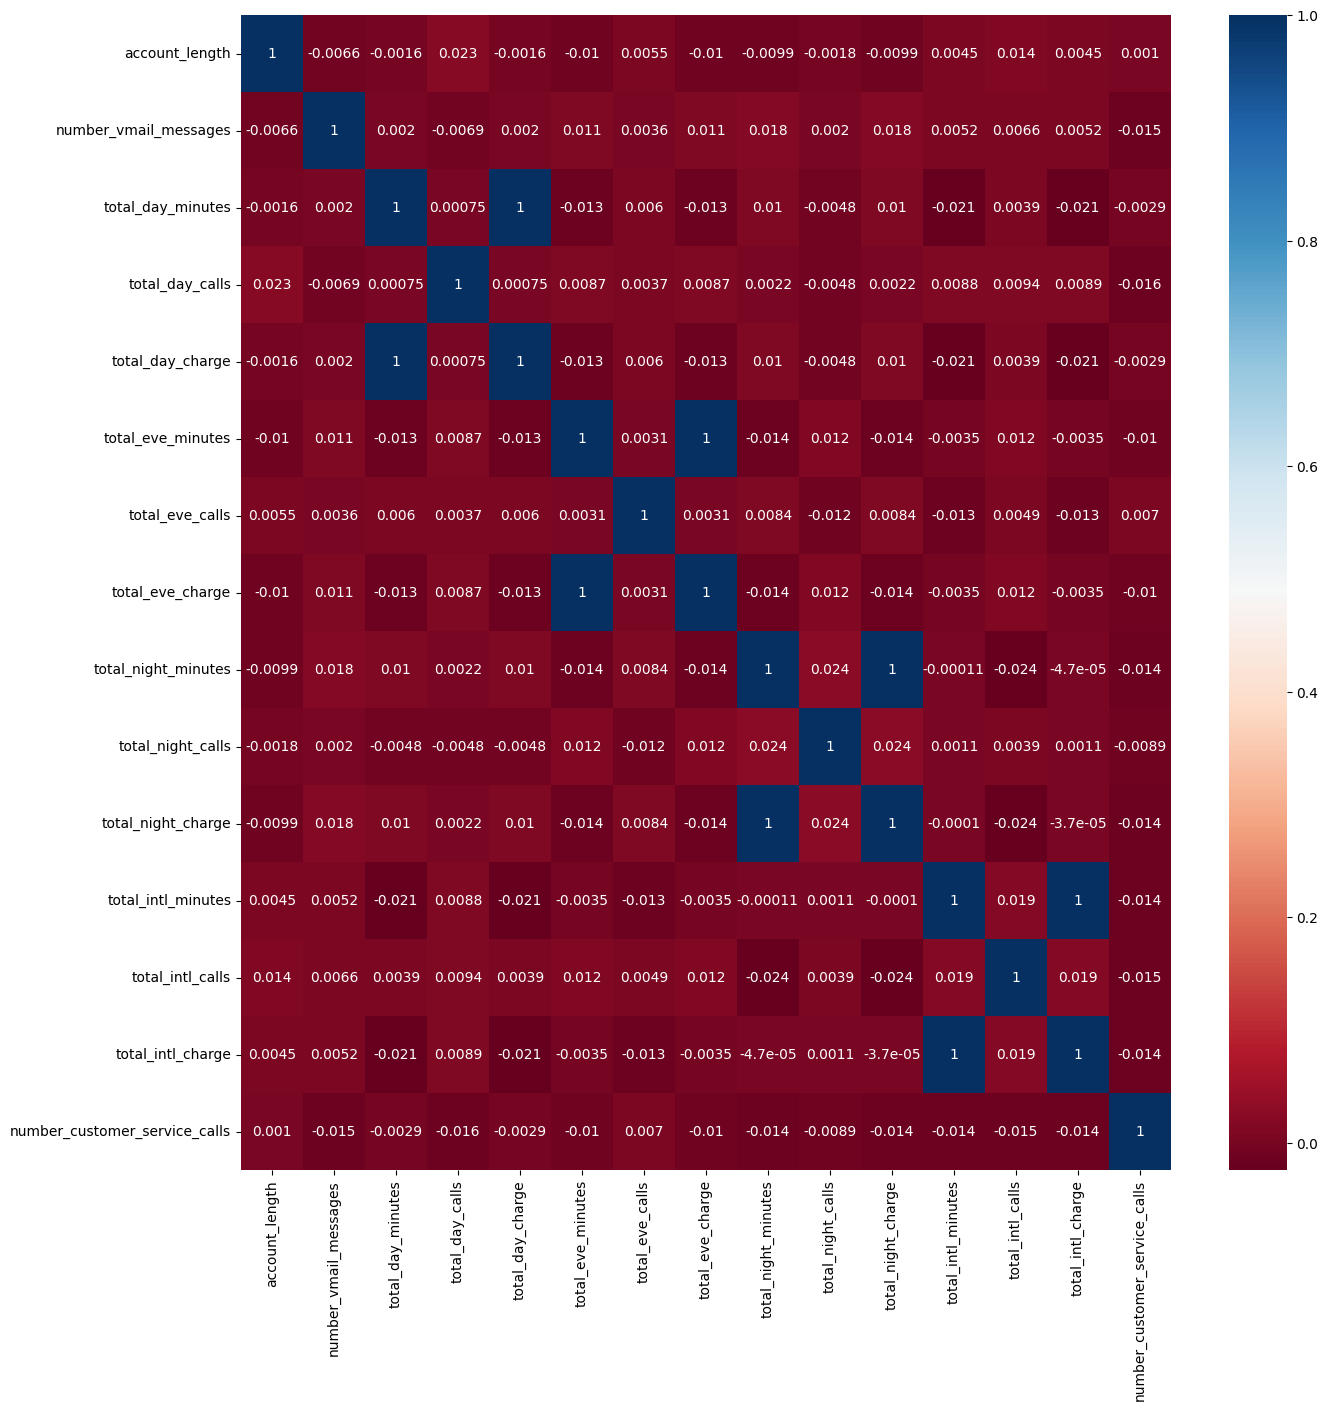

In [147]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='RdBu',annot=True)

# DATA PREPROCESSING

In [148]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [149]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['international_plan','voice_mail_plan','area_code']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

state                             object
account_length                     int64
area_code                          int32
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [150]:
df['churn'].replace(to_replace='yes', value=1, inplace=True)
df['churn'].replace(to_replace='no',value=0, inplace=True)

In [151]:
df.drop(columns=['state'],inplace=True)

In [152]:
features = ['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls']

In [153]:
X=df[features]
Y=df['churn']

In [154]:
df.shape

(4250, 19)

In [155]:
importance=mutual_info_classif(X,Y,random_state=12)
feat_importance=pd.Series(importance,features)
feat_importance

account_length                   0.000000
area_code                        0.001372
international_plan               0.025072
voice_mail_plan                  0.000229
number_vmail_messages            0.007072
total_day_minutes                0.065087
total_day_calls                  0.000000
total_day_charge                 0.065273
total_eve_minutes                0.001002
total_eve_calls                  0.000000
total_eve_charge                 0.002045
total_night_minutes              0.004606
total_night_calls                0.003256
total_night_charge               0.007809
total_intl_minutes               0.004479
total_intl_calls                 0.009733
total_intl_charge                0.009964
number_customer_service_calls    0.032958
dtype: float64

In [156]:
df.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.992941,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.709978,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,1.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,1.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,2.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [157]:
# SPLIT DATA
sm = SMOTE(random_state=123)
X, Y = sm.fit_resample(X, Y)
x_train,x_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

# Data Standarized

sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

Counter(Y)

Counter({0: 3652, 1: 3652})

In [158]:
X.shape

(7304, 18)

In [159]:
from joblib import dump
dump(sc_X, 'sc.bin', compress=True)

['sc.bin']

In [160]:
df.shape

(4250, 19)

 # CREATE MODEL

In [216]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('Logistic Regresion:'+str(acc_log))
print(classification_report(Y_test, Y_pred))
print('Accuracy Score: ', accuracy_score(Y_test,Y_pred))
model_roc_auc = roc_auc_score(Y_test, Y_pred) 
print("Area under curve:", model_roc_auc,"\n")

# Support Vector Machine
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print('SVC:'+str(acc_svc))
print(classification_report(Y_test, Y_pred))
print('Accuracy Score: ', accuracy_score(Y_test,Y_pred))
model_roc_auc = roc_auc_score(Y_test, Y_pred) 
print("Area under curve:", model_roc_auc,"\n")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print('KNN:'+str(acc_knn))
print(classification_report(Y_test, Y_pred))
print('Accuracy Score: ', accuracy_score(Y_test,Y_pred))
model_roc_auc = roc_auc_score(Y_test, Y_pred) 
print("Area under curve:", model_roc_auc,"\n")

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print('Gausian:'+str(acc_gaussian))
print(classification_report(Y_test, Y_pred))
print('Accuracy Score: ', accuracy_score(Y_test,Y_pred))
model_roc_auc = roc_auc_score(Y_test, Y_pred) 
print("Area under curve:", model_roc_auc,"\n")

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print('DT:'+str(acc_decision_tree))
print(classification_report(Y_test, Y_pred))
print('Accuracy Score: ', accuracy_score(Y_test,Y_pred))
model_roc_auc = roc_auc_score(Y_test, Y_pred) 
print("Area under curve:", model_roc_auc,"\n")

# Random Forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
rfc.score(X_train, Y_train)
acc_random_forest = round(rfc.score(X_train, Y_train) * 100, 2)
print('RF:'+str(acc_random_forest))
print(classification_report(Y_test, Y_pred))
print('Accuracy Score: ', accuracy_score(Y_test,Y_pred))
model_roc_auc = roc_auc_score(Y_test, Y_pred) 
print("Area under curve:", model_roc_auc,"\n")

Logistic Regresion:74.86
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1121
           1       0.74      0.80      0.77      1071

    accuracy                           0.76      2192
   macro avg       0.77      0.77      0.76      2192
weighted avg       0.77      0.76      0.76      2192

Accuracy Score:  0.7645985401459854
Area under curve: 0.7652880956129106 

SVC:90.04
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1121
           1       0.91      0.86      0.89      1071

    accuracy                           0.89      2192
   macro avg       0.89      0.89      0.89      2192
weighted avg       0.89      0.89      0.89      2192

Accuracy Score:  0.8909671532846716
Area under curve: 0.8903585817318304 

KNN:93.45
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1121
           1       0.82      0.96      0.8

In [217]:
#gives model report in dataframe
def model_report(model,X_train,X_test,Y_train,Y_test,name) :
    model.fit(X_train,Y_train)
    predictions  = model.predict(X_test)
    accuracy     = accuracy_score(Y_test,predictions)
    recallscore  = recall_score(Y_test,predictions)
    precision    = precision_score(Y_test,predictions)
    roc_auc      = roc_auc_score(Y_test,predictions)
    f1score      = f1_score(Y_test,predictions) 
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc]
                      })
    return df

#outputs for every model
model1 = model_report(logreg,X_train,X_test,Y_train,Y_test, "Logistic Regression")
model2 = model_report(decision_tree,X_train,X_test,Y_train,Y_test, "Decision Tree")
model3 = model_report(knn,X_train,X_test,Y_train,Y_test, "KNN Classifier")
model4 = model_report(rfc,X_train,X_test,Y_train,Y_test, "Random Forest Classifier")
model5 = model_report(gaussian,X_train,X_test,Y_train,Y_test, "Naive Bayes")
model6 = model_report(svc,X_train,X_test,Y_train,Y_test, "SVM Classifier Linear")


#concat all models
model_performances = pd.concat([model1,model2,model3,model4,model5,model6,],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

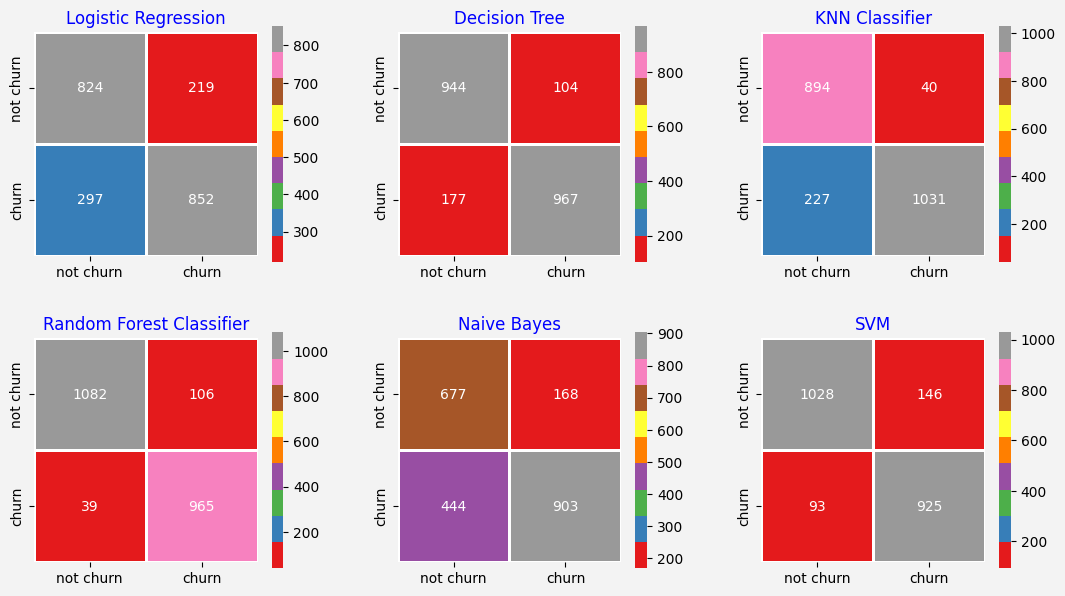

In [218]:
import itertools

lst    = [logreg,decision_tree,knn,rfc,gaussian,svc]

length = len(lst)

mods   = ['Logistic Regression','Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",'SVM']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions,Y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

In [53]:
from sklearn.model_selection import GridSearchCV
###Grid Serch best parameters
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [50,100]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, Y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier()

In [219]:
df_test = pd.read_csv("Data Test.csv")
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [220]:
pd.isnull(df_test).sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [221]:
df_test.dtypes

id                                 int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [222]:
df_test.drop(columns=['state'],inplace=True)

In [223]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['international_plan','voice_mail_plan','area_code']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])
df_test.dtypes

id                                 int64
account_length                     int64
area_code                          int32
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [224]:
Xtest.shape

(750, 18)

In [225]:
Xtest = df_test[features]

In [226]:
submission_predictions_r = rfc.predict(Xtest)
submission_predictions_k = knn.predict(Xtest)
submission_predictions_d = decision_tree.predict(Xtest)
submission_predictions_s = svc.predict(Xtest)

C:\Users\Riza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Riza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

C:\Users\Riza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

C:\Users\Riza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



In [227]:
submission_r = pd.DataFrame({
        "id": df_test["id"],
        "churn": submission_predictions_r
    })
submission_d = pd.DataFrame({
        "id": df_test["id"],
        "churn": submission_predictions_d
    })
submission_k = pd.DataFrame({
        "id": df_test["id"],
        "churn": submission_predictions_k
    })
submission_s = pd.DataFrame({
        "id": df_test["id"],
        "churn": submission_predictions_s
    })

Data Test (Random Forest)

In [228]:
submission_r.head()

,id,churn
0,1,0
1,2,1
2,3,1
3,4,1
4,5,1


In [229]:
submission_r.groupby(['churn']).size()

churn
0    211
1    539
dtype: int64

In [230]:
539/750

0.7186666666666667

Data Test (kNN)

In [231]:
submission_k.groupby(['churn']).size()

churn
0     35
1    715
dtype: int64

In [232]:
715/750

0.9533333333333334

Data Test (Decission Tree)

In [233]:
submission_d.groupby(['churn']).size()

churn
0      1
1    749
dtype: int64

In [234]:
749/750

0.9986666666666667

Data Test (SVM)

In [235]:
submission_s.groupby(['churn']).size()

churn
0    750
dtype: int64

In [236]:
750/750

1.0

Save Predict to CSV

In [239]:
submission_r.to_csv("loan_prediction_randomforest.csv", index=False)
submission_d.to_csv("loan_prediction_decisiontree.csv", index=False)
submission_k.to_csv("loan_prediction_knn.csv", index=False)
submission_s.to_csv("loan_prediction_svm.csv", index=False)